In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
iris = sns.load_dataset('iris')

In [3]:
x = iris.drop('species', axis=1)
y = iris['species']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [5]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [6]:
treePredictions = decisionTree.predict(x_test)

In [9]:
print(confusion_matrix(y_test, treePredictions))

[[19  0  0]
 [ 0 10  3]
 [ 0  2 11]]


In [10]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.83      0.77      0.80        13
   virginica       0.79      0.85      0.81        13

    accuracy                           0.89        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.89      0.89      0.89        45



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
iris = sns.load_dataset('iris')

In [13]:
x = iris.drop('species', axis=1)
y = iris['species']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [15]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

In [16]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.9111111111111111
4 : 0.9555555555555556
5 : 0.9333333333333333
8 : 0.9555555555555556
10 : 0.9777777777777777
20 : 0.9555555555555556
50 : 0.9555555555555556
75 : 0.9555555555555556
100 : 0.9555555555555556
250 : 0.9555555555555556
500 : 0.9555555555555556


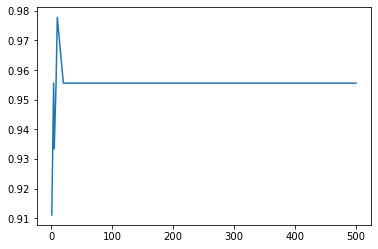

In [19]:
plt.plot(n_estimators_array, results)

In [20]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [21]:
rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [22]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [23]:
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20}

In [24]:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=4, max_features="auto", max_depth=30)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=10)

In [25]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [26]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

sepal_length    0.040176
sepal_width     0.007197
petal_length    0.518984
petal_width     0.433643
dtype: float64

In [27]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

petal_length    0.518984
petal_width     0.433643
sepal_length    0.040176
sepal_width     0.007197
dtype: float64


<AxesSubplot:>

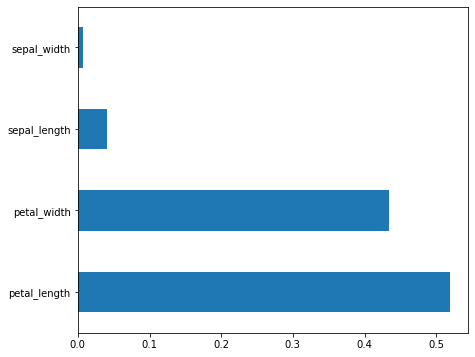

In [28]:
feature_importances.plot(kind='barh', figsize=(7,6))

In [1]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import quandl